#Task:
Mixture of Gaussian, EM-Algorithm
<br>
Apply EM algorithm to fit a mixture of gaussian distribution to the following datasets: 

In [7]:
import numpy as np
%matplotlib inline

##Dataset 1

In [12]:
# Make some random data in 2D.
np.random.seed(150)
means = np.array([[2.1, 4.5],
                  [2.0, 2.7],
                  [3.5, 5.6]])
covariances = [np.array([[0.20, 0.10], [0.10, 0.60]]),
               np.array([[0.35, 0.22], [0.22, 0.15]]),
               np.array([[0.06, 0.05], [0.05, 1.30]])]
amplitudes = [5, 1, 2]
factor = 100
data = np.zeros((1, 2))
for i in range(len(means)):
    data = np.concatenate([data,
         np.random.multivariate_normal(means[i], covariances[i],
                                           size=factor * amplitudes[i])])
dataset_1 = data[1:, :]

##Dataset 2

In [13]:
# Make some random data in 2D.
np.random.seed(150)
means = np.array([[1.1, 6.5],
                  [2.5, 4.7],
                  #[3.0, 2.6],
                  [3.0, 3.3]])
covariances = [np.array([[0.55, -0.10], [-0.10, 0.25]]),
               np.array([[0.35, 0.22], [0.22, 0.20]]),
               #np.array([[0.06, 0.05], [0.05, 1.30]]),
               np.array([[0.06, 0.05], [0.05, 1.30]])]
amplitudes = [4, 1, 3]
factor = 100

data = np.zeros((1, 2))
for i in range(len(means)):
    data = np.concatenate([data,
        np.random.multivariate_normal(means[i], covariances[i],
                                            size=factor * amplitudes[i])])
dataset_2 = data[1:, :]

Visualise the results (plot the samples color coded by fit mixture component, plot ellipsoids for Gaussians)

# Results
The output for the Dataset1 can look like: 

<img src="files/04_Exercise1_MoG_EM.png">

In [ ]:
# Ref: https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.mixture import GaussianMixture
from matplotlib.patches import Ellipse

In [115]:
plt.rcParams["figure.figsize"] = (8,8)

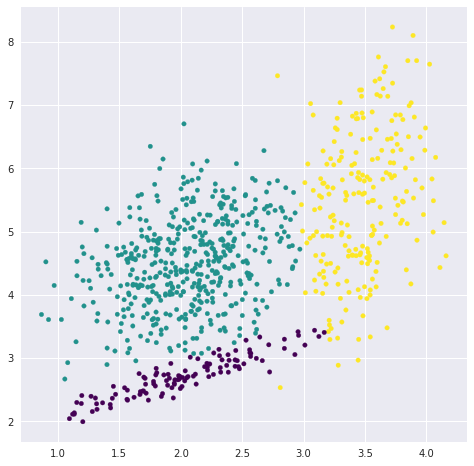

In [117]:
X = dataset_1[:,:]

gmm = GaussianMixture(n_components=3).fit(X)
labels = gmm.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, s=20, cmap='viridis');

plt.show()

In [73]:
# probability that a point belongs to a cluster
probs = gmm.predict_proba(X)
print(probs[:].round(3))

[[0.    0.    1.   ]
 [0.001 0.    0.999]
 [0.349 0.    0.651]
 ...
 [0.997 0.    0.003]
 [0.575 0.406 0.019]
 [0.998 0.    0.002]]


In [130]:
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height, angle, **kwargs))
        
def plot_gmm(gmm, X, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=20, cmap='viridis', zorder=2)
    
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w)

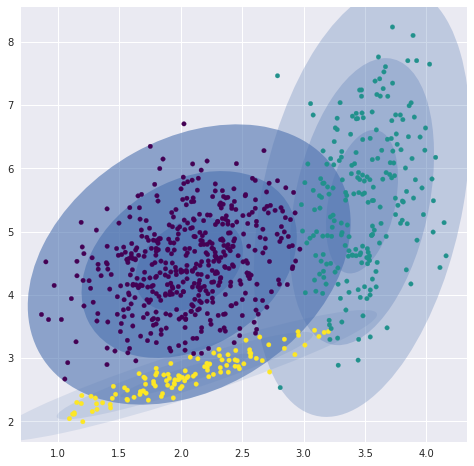

In [131]:
gmm = GaussianMixture(n_components=3, covariance_type='full')
plot_gmm(gmm, X)